In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler

In [2]:
df1 = pd.read_csv('Titanic.csv')

In [3]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

In [12]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df2=df1.drop('Cabin' ,axis=1)

In [14]:
df2['Embarked'] = df2['Embarked'].fillna('S')

In [15]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df2.shape

(891, 11)

In [17]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
Sex = pd.get_dummies(df2['Sex'],drop_first=True)

In [19]:
Embarked = pd.get_dummies(df2['Embarked'],drop_first=True)

In [20]:
df3=df2.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1)

In [21]:
df4 = pd.concat([df3,Sex,Embarked],axis=1)

In [22]:
df4


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0


<Axes: xlabel='Survived', ylabel='count'>

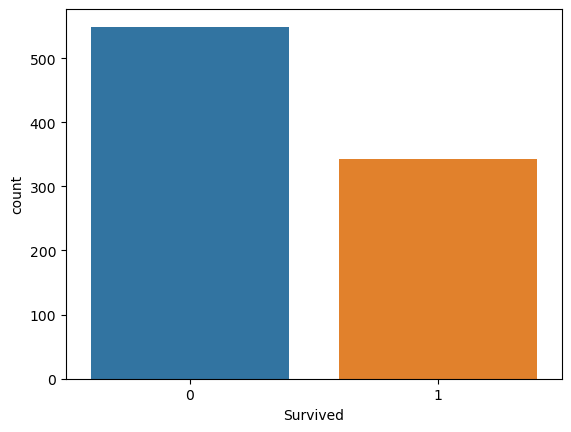

In [23]:
sns.countplot(x = 'Survived' , data=df4)

<Axes: >

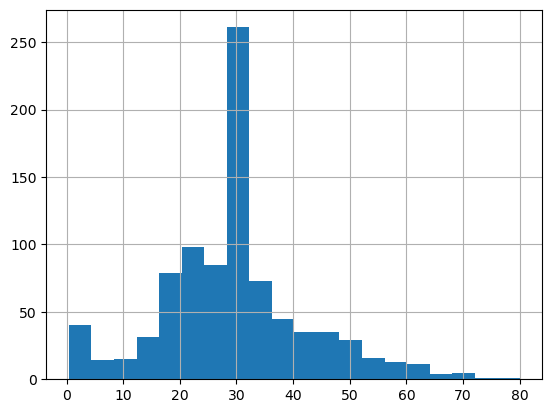

In [24]:
df4['Age'].hist(bins=20)

<Axes: >

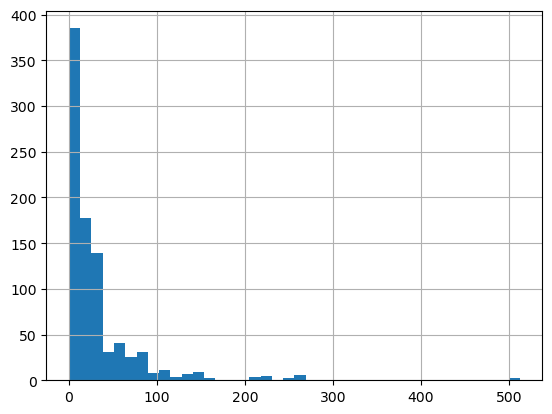

In [25]:
df4['Fare'].hist(bins=40)


In [26]:
le = LabelEncoder()
df4['male'] = le.fit_transform(df4['male'])
df4['Q'] = le.fit_transform(df4['Q'])
df4['S'] = le.fit_transform(df4['S'])

In [27]:
mm = MinMaxScaler()
df4['Fare'] = mm.fit_transform(df4['Fare'].values.reshape(-1, 1))

In [28]:
df4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,1,0,1
1,2,1,1,38.0,1,0,0.139136,0,0,0
2,3,1,3,26.0,0,0,0.015469,0,0,1
3,4,1,1,35.0,1,0,0.103644,0,0,1
4,5,0,3,35.0,0,0,0.015713,1,0,1


In [29]:
X = df4.drop((['Survived' , 'PassengerId']) , axis = 1)
y = df4['Survived']

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=42)

In [31]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [33]:
from xgboost import XGBClassifier
model= XGBClassifier()

In [35]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
preds_train = model.predict(X_train)
print("Model accuracy: ", accuracy_score(preds_train, y_train))

Model accuracy:  0.9634831460674157


In [37]:
preds_test = model.predict(X_test)
print("Model Accuracy:", accuracy_score(preds_test, y_test))

Model Accuracy: 0.8156424581005587


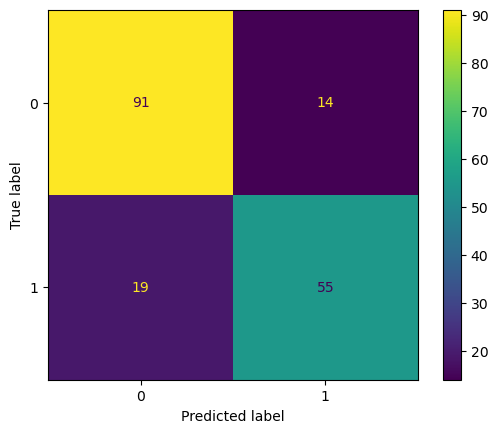

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ax = ConfusionMatrixDisplay.from_predictions(y_test, preds_test)

plt.show()